In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly.graph_objects as go
import plotly.express as px
import networkx as nx
import geopandas as gpd
import numpy as np


In [2]:
# Load Data
def load_data():
    file_path = input("Please enter the path to your CSV dataset: ")
    try:
        data = pd.read_csv(file_path)
        print(f"Dataset loaded successfully from {file_path}")
        print(f"Dataset Columns: {data.columns}")
        return data
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

# 1. Bar Chart
def bar_chart(data):
    column = input("Enter the column name for bar chart (categorical): ")
    if column in data.columns:
        sns.countplot(x=column, data=data)
        plt.title(f'Distribution of {column}')
        plt.show()
    else:
        print(f"Column '{column}' not found in the dataset.")

# 2. Line Chart
def line_chart(data):
    x_column = input("Enter the x-axis column name: ")
    y_column = input("Enter the y-axis column name: ")
    if x_column in data.columns and y_column in data.columns:
        plt.plot(data[x_column], data[y_column], color='blue')
        plt.title(f'{y_column} vs {x_column}')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.show()
    else:
        print(f"Columns '{x_column}' or '{y_column}' not found in the dataset.")

# 3. Pie Chart
def pie_chart(data):
    column = input("Enter the column name for pie chart (categorical): ")
    if column in data.columns:
        data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=data[column].unique())
        plt.title(f'{column} Distribution')
        plt.ylabel('')
        plt.show()
    else:
        print(f"Column '{column}' not found in the dataset.")

# 4. Scatter Plot
def scatter_plot(data):
    x_column = input("Enter the x-axis column name: ")
    y_column = input("Enter the y-axis column name: ")
    if x_column in data.columns and y_column in data.columns:
        plt.scatter(data[x_column], data[y_column], alpha=0.5)
        plt.title(f'{y_column} vs {x_column}')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.show()
    else:
        print(f"Columns '{x_column}' or '{y_column}' not found in the dataset.")

# 5. Histogram
def histogram(data):
    column = input("Enter the column name for histogram: ")
    if column in data.columns:
        plt.hist(data[column], bins=20, color='purple', edgecolor='black')
        plt.title(f'{column} Distribution')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"Column '{column}' not found in the dataset.")

# 6. Heatmap
def heatmap(data):
    plt.figure(figsize=(10, 8))
    corr_matrix = data.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

# 7. Box Plot
def box_plot(data):
    column = input("Enter the column name for box plot: ")
    if column in data.columns:
        sns.boxplot(x=data[column])
        plt.title(f'Box Plot for {column}')
        plt.show()
    else:
        print(f"Column '{column}' not found in the dataset.")

# 8. Bubble Chart
def bubble_chart(data):
    x_column = input("Enter the x-axis column name: ")
    y_column = input("Enter the y-axis column name: ")
    size_column = input("Enter the column name for bubble size: ")
    if x_column in data.columns and y_column in data.columns and size_column in data.columns:
        plt.scatter(data[x_column], data[y_column], s=data[size_column]*2, alpha=0.5)
        plt.title(f'{y_column} vs {x_column} (Bubble Size: {size_column})')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.show()
    else:
        print(f"Columns '{x_column}', '{y_column}' or '{size_column}' not found in the dataset.")

# 9. Tree Map
def tree_map(data):
    column = input("Enter the column name for tree map (categorical): ")
    if column in data.columns:
        counts = data[column].value_counts()
        plt.figure(figsize=(10, 7))
        squarify.plot(sizes=counts, label=counts.index, color=['green', 'red'], alpha=0.7)
        plt.title(f'Tree Map of {column} Distribution')
        plt.axis('off')
        plt.show()
    else:
        print(f"Column '{column}' not found in the dataset.")

# 10. Area Chart
def area_chart(data):
    x_column = input("Enter the x-axis column name: ")
    y_column = input("Enter the y-axis column name: ")
    if x_column in data.columns and y_column in data.columns:
        plt.fill_between(data[x_column], data[y_column], color='skyblue', alpha=0.4)
        plt.plot(data[x_column], data[y_column], color='blue', alpha=0.6)
        plt.title(f'{y_column} by {x_column} (Area Chart)')
        plt.xlabel(x_column)
        plt.ylabel(y_column)
        plt.show()
    else:
        print(f"Columns '{x_column}' or '{y_column}' not found in the dataset.")

# 11. Waterfall Chart
def waterfall_chart(data):
    column = input("Enter the column name for waterfall chart (numeric): ")
    if column in data.columns:
        fig = go.Figure(go.Waterfall(
            y=data[column],
            measure=["relative"] * len(data[column]),
            increasing={"marker": {"color": "green"}},
            decreasing={"marker": {"color": "red"}}
        ))
        fig.update_layout(title=f'Waterfall Chart for {column}')
        fig.show()
    else:
        print(f"Column '{column}' not found in the dataset.")

# 12. Radar Chart
def radar_chart(data):
    columns = input("Enter the numeric column names for radar chart (comma-separated): ").split(',')
    if all(col in data.columns for col in columns):
        fig = go.Figure(data=go.Scatterpolar(
            r=data[columns].mean(),
            theta=columns,
            fill='toself'
        ))
        fig.update_layout(title="Radar Chart")
        fig.show()
    else:
        print("One or more columns not found in the dataset.")

# 13. Funnel Chart
def funnel_chart(data):
    category_column = input("Enter the categorical column name for funnel chart: ")
    value_column = input("Enter the numeric column name for funnel chart: ")
    if category_column in data.columns and value_column in data.columns:
        fig = go.Figure(go.Funnel(
            y=data[category_column],
            x=data[value_column],
            textinfo="value+percent initial"
        ))
        fig.update_layout(title="Funnel Chart")
        fig.show()
    else:
        print(f"Columns '{category_column}' or '{value_column}' not found in the dataset.")

# 14. Sankey Diagram
def sankey_diagram(data):
    source_column = input("Enter the source column name for Sankey diagram: ")
    target_column = input("Enter the target column name for Sankey diagram: ")
    value_column = input("Enter the value column name for Sankey diagram: ")
    if source_column in data.columns and target_column in data.columns and value_column in data.columns:
        fig = go.Figure(go.Sankey(
            node={"pad": 15, "thickness": 20, "line": {"color": "black", "width": 0.5}},
            link={"source": data[source_column], "target": data[target_column], "value": data[value_column]}
        ))
        fig.update_layout(title="Sankey Diagram")
        fig.show()
    else:
        print(f"Columns '{source_column}', '{target_column}' or '{value_column}' not found in the dataset.")

# 15. Gantt Chart
def gantt_chart(data):
    task_column = input("Enter the task column name for Gantt chart: ")
    start_column = input("Enter the start date column name: ")
    end_column = input("Enter the end date column name: ")
    if task_column in data.columns and start_column in data.columns and end_column in data.columns:
        fig = px.timeline(data, x_start=start_column, x_end=end_column, y=task_column)
        fig.update_layout(title="Gantt Chart")
        fig.show()
    else:
        print(f"Columns '{task_column}', '{start_column}' or '{end_column}' not found in the dataset.")

# 16. Violin Plot
def violin_plot(data):
    column = input("Enter the column name for violin plot (numeric): ")
    if column in data.columns:
        sns.violinplot(x=data[column])
        plt.title(f'Violin Plot for {column}')
        plt.show()
    else:
        print(f"Column '{column}' not found in the dataset.")

# 17. Choropleth Map
def choropleth_map(data):
    column = input("Enter the column name for Choropleth Map (geographical info): ")
    if column in data.columns:
        # Example assumes 'country' column and plot data accordingly
        fig = px.choropleth(data, locations=column, color=column)
        fig.update_layout(title="Choropleth Map")
        fig.show()
    else:
        print(f"Column '{column}' not found in the dataset.")

# 18. Network Graph
def network_graph(data):
    node_column = input("Enter the column name for nodes in network graph: ")
    if node_column in data.columns:
        G = nx.Graph()
        for node in data[node_column]:
            G.add_node(node)
        nx.draw(G, with_labels=True)
        plt.title("Network Graph")
        plt.show()
    else:
        print(f"Column '{node_column}' not found in the dataset.")

# 19. Donut Chart
def donut_chart(data):
    column = input("Enter the column name for donut chart (categorical): ")
    if column in data.columns:
        data[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, labels=data[column].unique())
        plt.gca().set_aspect('equal')  
        plt.title(f'{column} Distribution (Donut Chart)')
        plt.show()
    else:
        print(f"Column '{column}' not found in the dataset.")

# 20. Polar Chart
def polar_chart(data):
    column = input("Enter the column name for polar chart (numeric): ")
    if column in data.columns:
        angles = np.linspace(0, 2 * np.pi, len(data[column]), endpoint=False)
        plt.subplot(111, polar=True)
        plt.plot(angles, data[column], linewidth=2, linestyle='solid')
        plt.title(f'{column} Polar Chart')
        plt.show()
    else:
        print(f"Column '{column}' not found in the dataset.")

Please enter the path to your CSV dataset: /Users/varsharani/Downloads/diabetes-data.csv
Dataset loaded successfully from /Users/varsharani/Downloads/diabetes-data.csv
Dataset Columns: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Choose the type of graph you want to visualize:
1. Bar Chart
2. Line Chart
3. Pie Chart
4. Scatter Plot
5. Histogram
6. Heatmap
7. Box Plot
8. Bubble Chart
9. Tree Map
10. Area Chart
11. Waterfall Chart
12. Radar Chart
13. Funnel Chart
14. Sankey Diagram
15. Gantt Chart
16. Violin Plot
17. Choropleth Map
18. Network Graph
19. Donut Chart
20. Polar Chart
Enter the number of the graph: 1
Enter the column name for bar chart (categorical): BMI


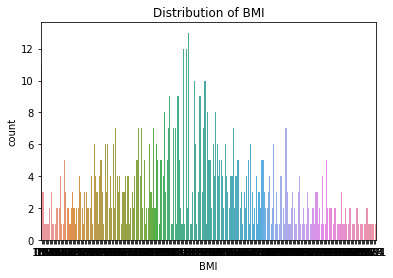

In [3]:


# Main Execution
if __name__ == "__main__":
    # Load the dataset by prompting the user
    data = load_data()
    
    if data is None:
        print("Dataset loading failed. Exiting the program.")
    else:
        # Prompt user for which graph they want to view
        print("Choose the type of graph you want to visualize:")
        print("1. Bar Chart")
        print("2. Line Chart")
        print("3. Pie Chart")
        print("4. Scatter Plot")
        print("5. Histogram")
        print("6. Heatmap")
        print("7. Box Plot")
        print("8. Bubble Chart")
        print("9. Tree Map")
        print("10. Area Chart")
        print("11. Waterfall Chart")
        print("12. Radar Chart")
        print("13. Funnel Chart")
        print("14. Sankey Diagram")
        print("15. Gantt Chart")
        print("16. Violin Plot")
        print("17. Choropleth Map")
        print("18. Network Graph")
        print("19. Donut Chart")
        print("20. Polar Chart")
        
        choice = int(input("Enter the number of the graph: "))
        
        # Call the appropriate function based on user input
        if choice == 1:
            bar_chart(data)
        elif choice == 2:
            line_chart(data)
        elif choice == 3:
            pie_chart(data)
        elif choice == 4:
            scatter_plot(data)
        elif choice == 5:
            histogram(data)
        elif choice == 6:
            heatmap(data)
        elif choice == 7:
            box_plot(data)
        elif choice == 8:
            bubble_chart(data)
        elif choice == 9:
            tree_map(data)
        elif choice == 10:
            area_chart(data)
        elif choice == 11:
            waterfall_chart(data)
        elif choice == 12:
            radar_chart(data)
        elif choice == 13:
            funnel_chart(data)
        elif choice == 14:
            sankey_diagram(data)
        elif choice == 15:
            gantt_chart(data)
        elif choice == 16:
            violin_plot(data)
        elif choice == 17:
            choropleth_map(data)
        elif choice == 18:
            network_graph(data)
        elif choice == 19:
            donut_chart(data)
        elif choice == 20:
            polar_chart(data)
        else:
            print("Invalid choice, please enter a number between 1 and 20.")